# Plotting exercises with `matplotlib` and `Seaborn`

## 1. Plotting simple functions

Example: plotting `sin(x ** 2)` for `x` between `-pi` and `pi`:

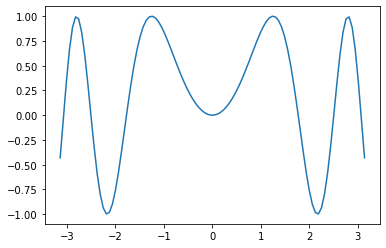

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x ** 2)

plt.plot(x, y)

**Exercise 1:** Plot the function `(x ** 2) * sin(1/x)` in the interval `[1e-5, pi]`.

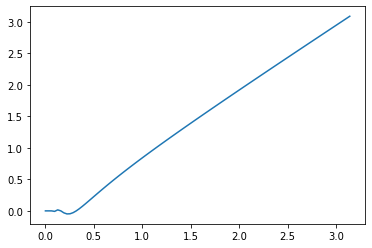

In [4]:
x = np.linspace(0.00001, np.pi, 100)
y = (x ** 2) * np.sin(1/x)

plt.plot(x, y)

**Exercise 2:** In the previous plot
- Change the linestyle to dotted, and the color to `#4A5859`.
- Add an appropiate title.

Text(0.5, 1.0, 'y = (x ** 2) * np.sin(1/x)')

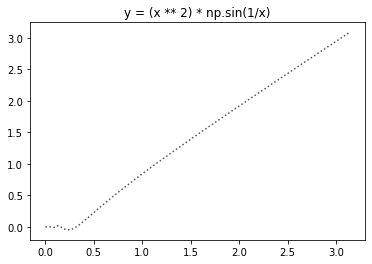

In [10]:
plt.plot(x, y, linestyle="dotted", color="#4A5859")
plt.title('"y = (x ** 2) * np.sin(1/x)")

**Exercise 3:** In the plot of exercise 1, remove all ticks in the x axis. ([Hint](https://stackoverflow.com/a/12998531))

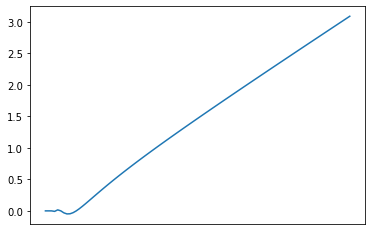

In [11]:
x = np.linspace(0.00001, np.pi, 100)
y = (x ** 2) * np.sin(1/x)
plt.plot(x, y)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

## 2. Using subplots

In the following exercises we will replicate this image:

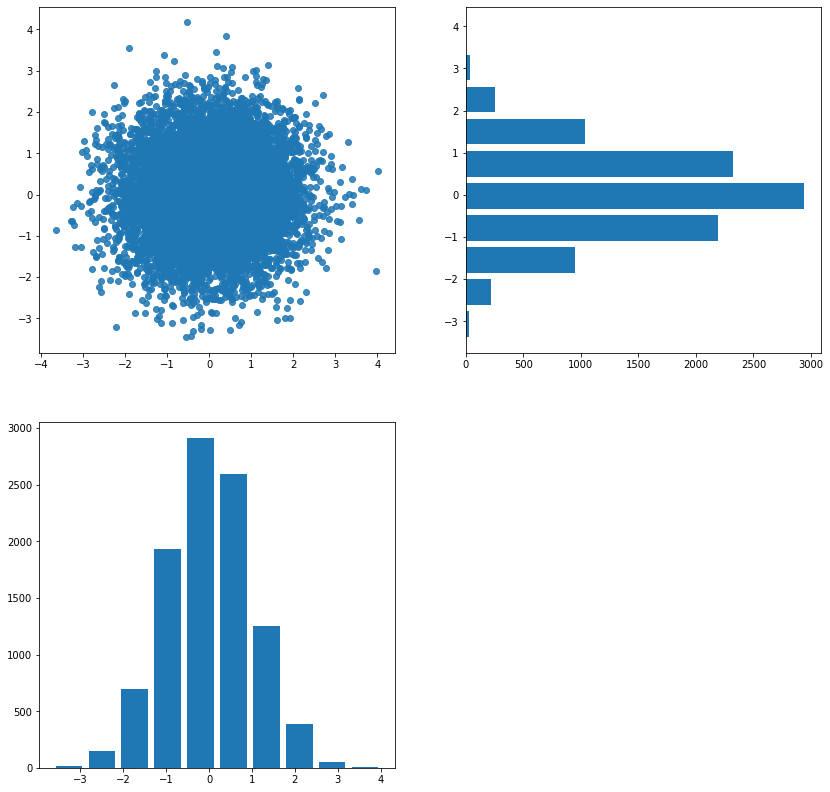

For that, we will `numpy`'s random numbers.

In [52]:
np.random.seed(1)
x = np.random.normal(0, 1, size=(10000,))
y = np.random.normal(0, 1, size=(10000,))

In [53]:
x, y

(array([ 1.62434536, -0.61175641, -0.52817175, ..., -1.01414382,
        -0.06269623, -1.43786989]),
 array([-0.12247391,  0.22816982, -0.35230513, ...,  2.4084338 ,
         0.88278555, -0.09959631]))

These arrays contain 100 numbers that are normally distributed around 0, with variance 1 each. The `np.random.seed(1)` allows us to replicate the same random numbers every time we run the cell.

**Exercise 4:** Create a 2x2 subplots figure. Set the size of the figure to be 14 by 14.

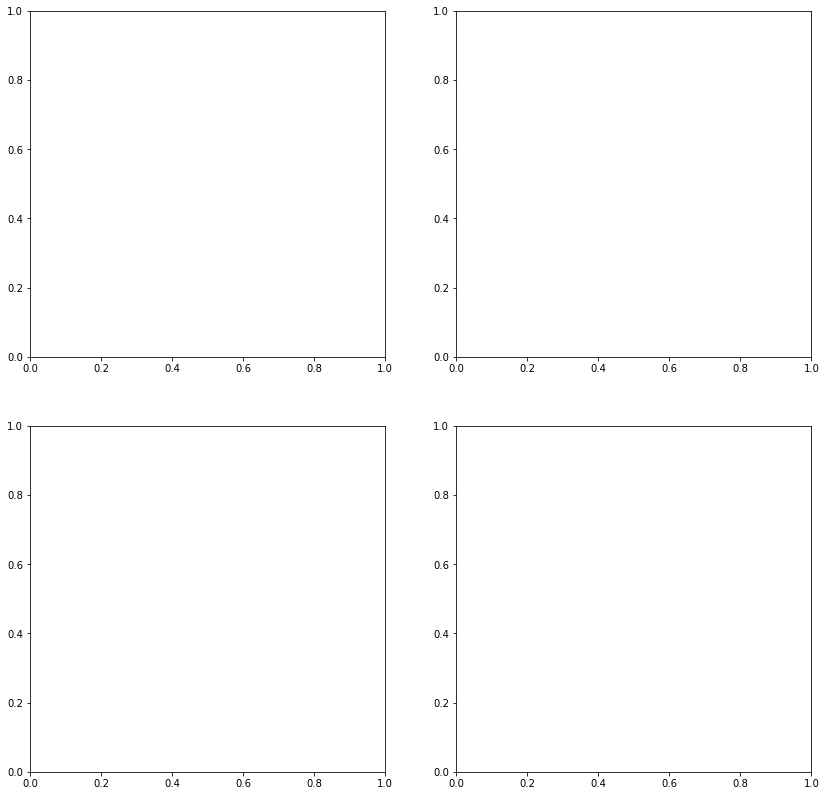

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

**Exercise 5:** In position `(0,0)` plot a scatter of x and y. Make the points a little bit transparent with an `alpha` of `0.85`.

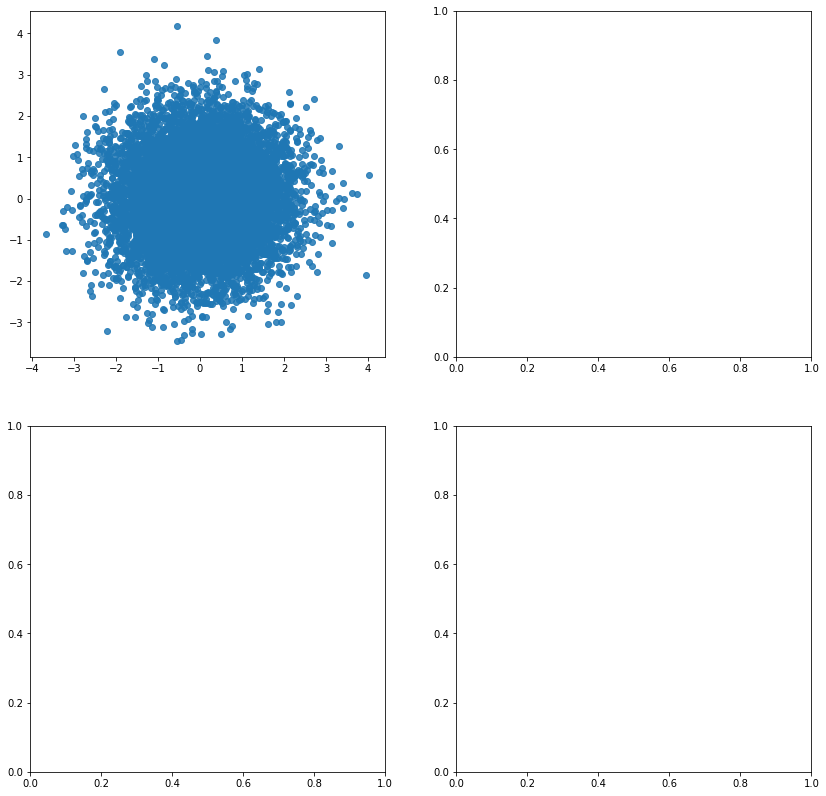

In [63]:
axes[0,0].scatter(x, y, alpha = 0.85)
fig

**Exercise 6:** Place a histogram of x in position `(1,0)`. Place a horizontal histogram of y in position `(0,1)`, and finish by turning off the axis in position `(1,1)`. To make it look slighly prettier, we can change the colors (as you wish) and we can reduce the width of the histogram bars using the `rwidth` keyword argument in the `.hist` calls.

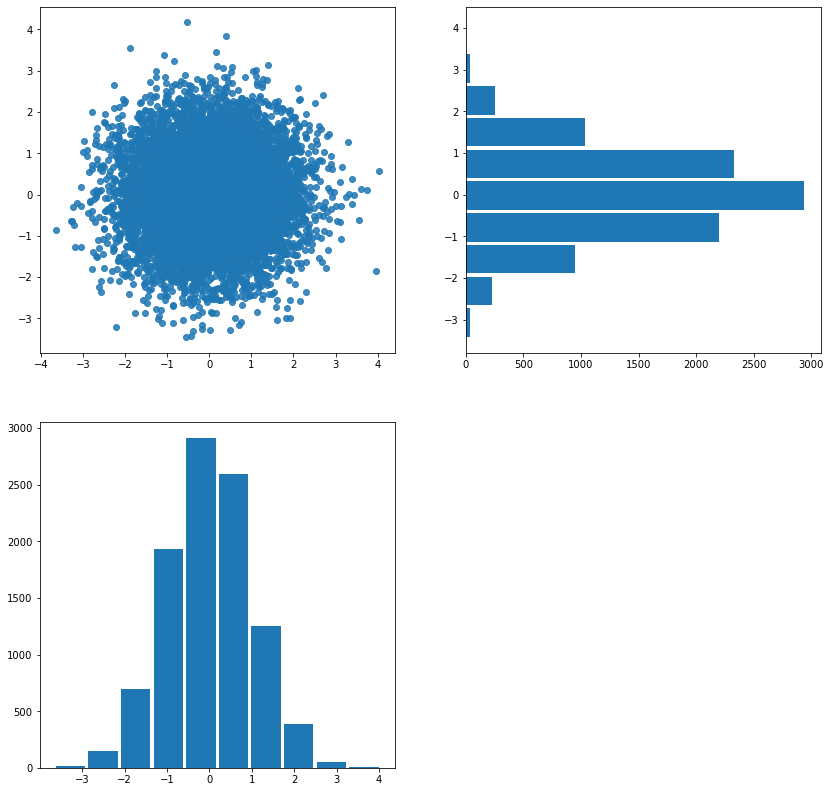

In [64]:
axes[1,0].hist(x, 10, rwidth=0.9)
axes[0,1].hist(y, 10, orientation="horizontal",rwidth=0.9)
axes[1,1].set_axis_off()
fig

## 3. Using seaborn for prettier plots

As you might have seen, `matplotlib` plots are pretty ugly. There is another plotting package, called `seaborn`, that has better-looking default plots, mostly focused on statistics. In these next exercises we will showcase some of the plots you can easily get with `seaborn`.

In [68]:
import seaborn as sns
sns.set_theme()  # applying the default seaborn theme

The backend of `seaborn` still accepts `numpy` arrays, so let's use the same arrays we defined in the previous exercise:

In [66]:
np.random.seed(1)
x = np.random.normal(0, 1, size=(10000,))
y = np.random.normal(0, 1, size=(10000,))

**Exercise 7:** Plot the histogram and distribution of these points in a (1, 2) subplot. Use `sns.histplot`, pass the axis at the `ax` flag, with the `kde` keyword argument being `True`.

<AxesSubplot:ylabel='Count'>

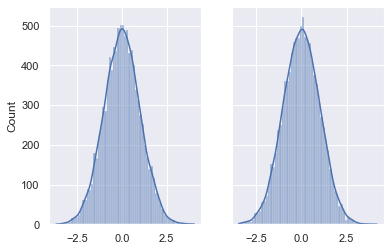

In [70]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.histplot(x, kde=True, ax=ax1)
sns.histplot(y, kde=True, ax=ax2)

**Exercise 8**: In this final exercise, we will combine what we learned from `pandas` with `seaborn`.

1. Load up a DataFrame `df` using `read_csv` from the following address: `https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data`. The column names are `sepal_length, sepal_width, petal_length, petal_width, class`. This data, known as the IRIS classification task, consists of measurements for different types of three different types of flowers: setosas, versicolors and virginicas.

In [71]:
import pandas as pd

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=columns)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2. Check [the documentation of `sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot). Apply it to our `df` using `"class"` in the `hue` keyword argument.

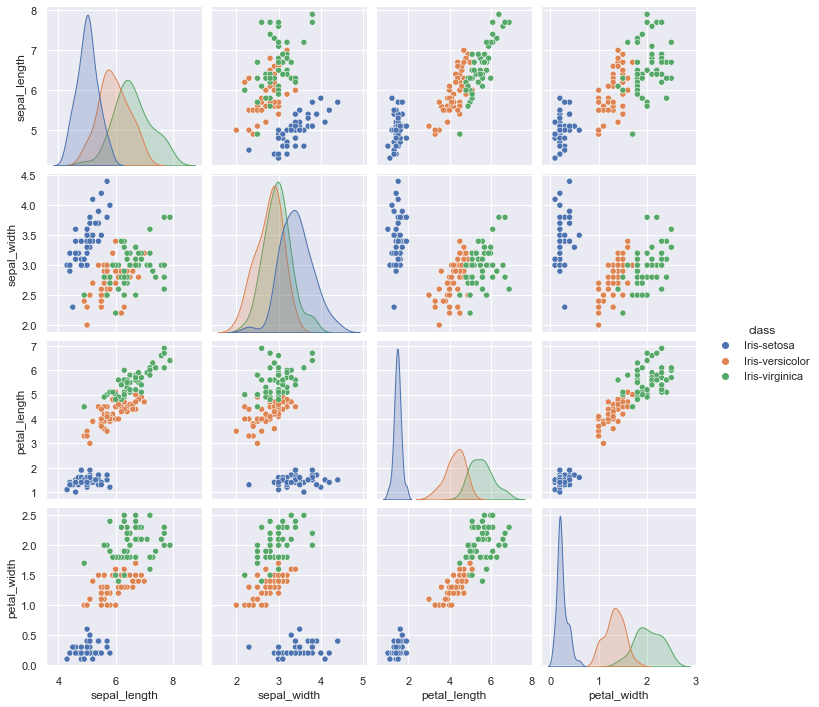

In [74]:
sns.pairplot(
    data=df,
    hue="class")

3. What is this plot telling you? What can you say about the differences between the classes?

I can see that the Iris-setosa class tends to have much narrower and shorter petals when compared to the other classes, with the Iris-virginica having the longest and widest but being fairly close to the Iris-versicolor. On the other hand, the only attribute in which the Iris-setosa beats the other two is, narrowly, in sepal width. There seem to be no significant relationships between pairs of data, made exception for petal length and petal width. 